## AnthroScore Analysis
We conduct an analysis of how the level of anthromorphism differ across various journals through measuring the Anthroscores in documents in each of these topics and how the AnthroScore for these documents change over time. 

In [1]:
# analysis of anthroscores
from anthroscore_utils import get_anthroscore

In [2]:
import torch
from transformers import RobertaForMaskedLM, RobertaTokenizer, DistilBertForMaskedLM

In [3]:
import transformers

We use the same term $X_{LM}$ and $X_{artifact}$ as in the paper: 

Thus, $X_{LM} = \{\}$ and $X_{artifact} = \{\}$

In [4]:
with open("LM_terms.txt") as f:
        LLM_entities = [line.rstrip('\n') for line in f]
    
model = DistilBertForMaskedLM.from_pretrained('roberta-base')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print("BERT model loaded on %s"%device)
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

You are using a model of type roberta to instantiate a model of type distilbert. This is not supported for all configurations of models and can yield errors.
Some weights of DistilBertForMaskedLM were not initialized from the model checkpoint at roberta-base and are newly initialized: ['transformer.layer.3.ffn.lin2.bias', 'transformer.layer.10.output_layer_norm.bias', 'transformer.layer.10.attention.out_lin.weight', 'transformer.layer.1.attention.k_lin.weight', 'transformer.layer.10.ffn.lin2.bias', 'transformer.layer.2.ffn.lin1.bias', 'transformer.layer.9.output_layer_norm.weight', 'transformer.layer.2.ffn.lin2.bias', 'transformer.layer.5.attention.out_lin.bias', 'transformer.layer.2.sa_layer_norm.weight', 'transformer.layer.6.ffn.lin1.bias', 'transformer.layer.4.attention.out_lin.bias', 'transformer.layer.1.ffn.lin1.bias', 'transformer.layer.11.attention.v_lin.weight', 'transformer.layer.0.sa_layer_norm.bias', 'transformer.layer.0.ffn.lin1.weight', 'transformer.layer.8.attention.q_lin

BERT model loaded on cuda


In [5]:
import pandas as pd

In [6]:
# get anthroscore of document
acl_articles = pd.read_parquet("acl-publication-info.74k.v2.parquet")

Preprocess the articles by dropping ones where either is abstract or the full text is None.

In [7]:
acl_articles_preprocessed = acl_articles.loc[acl_articles['full_text'].notnull() & acl_articles['abstract'].notnull()]

In [8]:
LLM_entities

['palm',
 'lms',
 'llama',
 'transformers',
 'language models',
 'language model',
 'gpt',
 'plms',
 'pretrained language models',
 'gpt-2',
 'xlnet',
 'large language models',
 'llms',
 'gpt-3',
 'foundation model',
 'gpt-neo',
 'gpt-j',
 'chatgpt',
 'gpt-4',
 'system',
 'model',
 'algorithm',
 'approach',
 'network',
 'software',
 'architecture',
 'framework']

## Overall analysis of AnthroScore
We are interested in studying how the anthromorphism for the papers in the ACL Anthology change over time.
Thus, we measure the AnthroScore for the abstracts of each paper, and measure change over time.



In [9]:

#acl_articles_preprocessed['anthroscore'] = acl_articles_preprocessed.abstract.apply(lambda a: get_anthroscore(a, entities=LLM_entities, model=model, tokenizer=tokenizer, device=device))

## Analysis Across AJCL
Get the papers associated with the American Journal of Computational Linguistics

In [10]:
american_journal_comp_ling = acl_articles_preprocessed.loc[acl_articles_preprocessed['journal'] == 'American Journal of Computational Linguistics']



Then, we compute the AnthroScore of the abstracts for the American Journal of Computational Linguistics using the $X_{LM}$ and $X_{artifact}$ terms.

In [11]:
#english_papers = acl_articles_preprocessed.loc[acl_articles['language'] == 'English']

#english_papers.shape
american_journal_comp_ling['anthroscore'] = american_journal_comp_ling.abstract.apply(lambda a: get_anthroscore(a, entities=LLM_entities, model=model, tokenizer=tokenizer, device=device))


Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recog

Sort the papers in ascending order by year.

In [12]:
american_journal_comp_ling.sort_values(by="year",inplace=True)

C:\Users\peiyu\AppData\Local\Temp\ipykernel_22976\3352088079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  american_journal_comp_ling.sort_values(by="year",inplace=True)


Get the anthroscore over time for the abstracts of the American Journal of Computational Linguistics.

<Axes: xlabel='year', ylabel='anthroscore'>

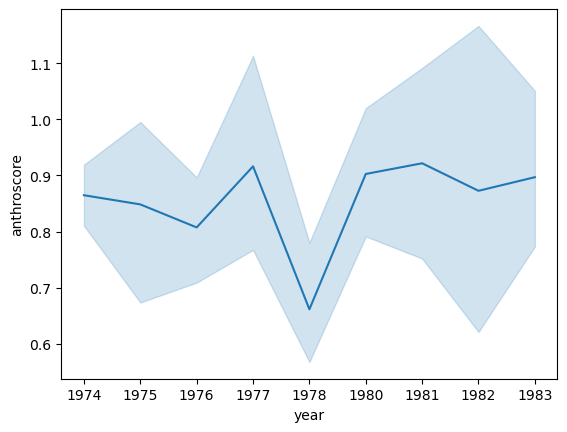

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.lineplot(x="year",y="anthroscore",data=american_journal_comp_ling)

## Computational Linguistics Journal
Next we analyze the Anthroscore of the abstracts for the journal Computational Linguistics.


In [14]:
comp_ling = acl_articles_preprocessed.loc[acl_articles_preprocessed['journal'] == 'Computational Linguistics']
comp_ling.sort_values(by="year",inplace=True)
comp_ling['anthroscore'] = comp_ling.abstract.apply(lambda a: get_anthroscore(a, entities=LLM_entities, model=model, tokenizer=tokenizer, device=device))


C:\Users\peiyu\AppData\Local\Temp\ipykernel_22976\2679162635.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_ling.sort_values(by="year",inplace=True)
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments 

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 [Text(-5.0, 0, ''),
  Text(0.0, 0, '1984'),
  Text(5.0, 0, '1989'),
  Text(10.0, 0, '1994'),
  Text(15.0, 0, '1999'),
  Text(20.0, 0, '2004'),
  Text(25.0, 0, '2009'),
  Text(30.0, 0, '2014'),
  Text(35.0, 0, '2019'),
  Text(40.0, 0, '')])

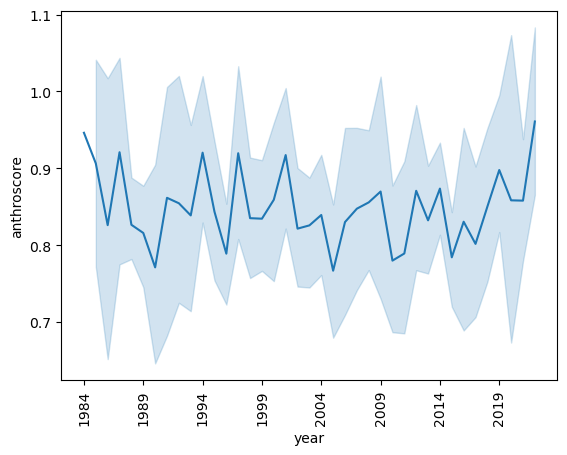

In [15]:
from matplotlib import ticker
ax = sns.lineplot(x="year",y="anthroscore",data=comp_ling)
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=5))
plt.xticks(rotation="vertical")

## TACL Journal
Finally, we analyze the abstracts of the journals for TACL.

In [16]:
tacl_journal = acl_articles_preprocessed.loc[acl_articles_preprocessed['journal'] == 'Transactions of the Association for Computational Linguistics']


In [17]:
tacl_journal.sort_values(by="year",inplace=True)

C:\Users\peiyu\AppData\Local\Temp\ipykernel_22976\498448431.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tacl_journal.sort_values(by="year",inplace=True)


In [18]:
tacl_journal['anthroscore'] = tacl_journal.abstract.apply(lambda a: get_anthroscore(a, entities=LLM_entities, model=model, tokenizer=tokenizer, device=device))


Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recog

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '2013'),
  Text(1, 0, '2014'),
  Text(2, 0, '2015'),
  Text(3, 0, '2016'),
  Text(4, 0, '2017'),
  Text(5, 0, '2018'),
  Text(6, 0, '2019'),
  Text(7, 0, '2020'),
  Text(8, 0, '2021'),
  Text(9, 0, '2022')])

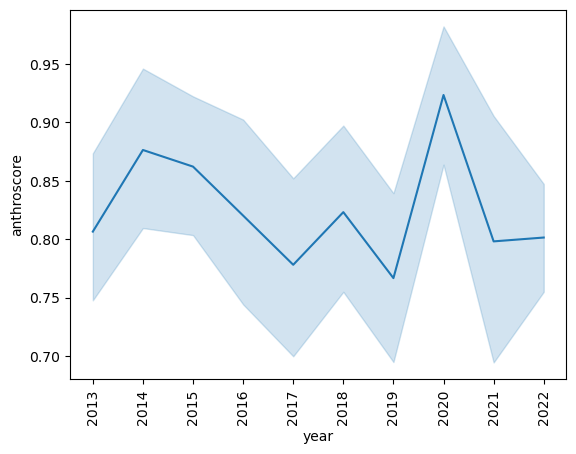

In [19]:
ax = sns.lineplot(x="year",y="anthroscore",data=tacl_journal)
#ax.xaxis.set_major_locator(ticker.MultipleLocator(base=5))
plt.xticks(rotation="vertical")

# AnthroScore in the Papers in the Last Five Years

In [34]:
recent_articles = acl_articles_preprocessed[acl_articles_preprocessed['year'] >= '2017']

In [35]:
recent_articles.sort_values(by='year',inplace=True)

C:\Users\peiyu\AppData\Local\Temp\ipykernel_22976\745982200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_articles.sort_values(by='year',inplace=True)


In [36]:
recent_articles.shape

(27608, 25)

In [37]:
# warning this takes 96 minutes to run on powerful CUDa machine
recent_articles['anthroscore'] = recent_articles.abstract.apply(lambda a: get_anthroscore(a, entities=LLM_entities, model=model, tokenizer=tokenizer, device=device))


Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recognized.
Keyword arguments {'truncate': True} not recog

In [38]:
recent_articles.to_csv("recent_articles_anthroscore.csv")

In [39]:
# recent articles
recent_articles = pd.read_csv("recent_articles_anthroscore.csv")

<Axes: xlabel='year', ylabel='anthroscore'>

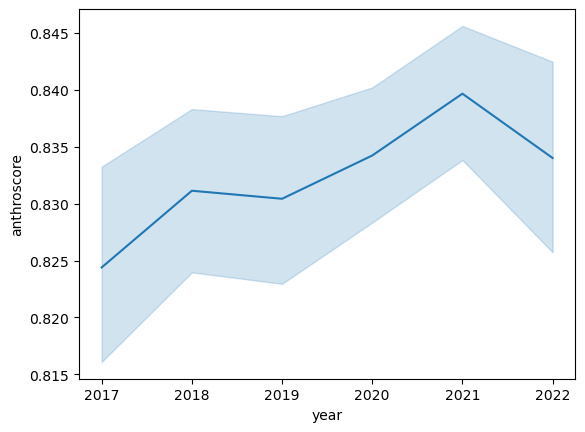

In [43]:
recent_articles.sort_values(by="year",inplace=True)

import seaborn as sns
sns.lineplot(x="year",y="anthroscore",data=recent_articles)